<h1 style="direction: rtl"> <b> תרגול  11: לוטקה וולטרה
</b> </h1>

#### imports and helper functions ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def grey_out_negative():
    xlim,ylim=plt.xlim(),plt.ylim()
    plt.fill_between([xlim[0],0],[ylim[0],ylim[0]],[ylim[1],ylim[1]],color='grey',alpha=0.2,zorder=1.5)
    plt.fill_between([0,xlim[1]],[ylim[0],ylim[0]],[0,0],color='grey',alpha=0.2,zorder=1.5)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

In [3]:
def plot_nullcline_and_intersections(alpha_12,alpha_21,K1,K2):
# nullclines
    plt.axvline(0,color='orange',label='nullcline $n_1$')
    plt.axhline(0,color='cyan',label='nullcline $n_2$')
    plt.axline((K1,0),slope=np.divide(1,-alpha_12),color='red',label='nullcline $n_1$')
    plt.axline((0,K2),slope=-alpha_21,color='blue',label='nullcline $n_2$')

    # fixed points
    plt.plot(0,0,'*k',label='fixed point')
    plt.plot(K1,0,'*k')
    plt.plot(0,K2,'*k')
    if alpha_12*alpha_21!=1:
        # we have intersection
        denom = 1-alpha_12*alpha_21
        plt.plot((K1-alpha_12*K2)/denom,(K2-alpha_21*K1)/denom,'*k')


    plt.xlabel('$n_1$')
    plt.ylabel('$n_2$')


<h3 style="direction: rtl">יציבות בחד מימד</h3>

<div style="direction: rtl">במודל דיפרנציאלי חד מימדי המערכת נעה לעבר ערכים גדולים יותר אם היא חיובית וערכים קטנים יותר אם היא שלילית: נקודה היא נקודת שבת אם הנגזרת בזמן היא 0, כי אז אין שינוי בזמן של המשתנה.</div>

$$ \frac{dn}{dt} =  r n \left(1-\frac{n}{k}\right) $$

<div style="direction: rtl">נוכל להציג את המערכת באמצעות מרחב פאזה: מרחב פאזה הוא פחות או יותר כל גרף בו כל נקודה מייצגת מצב של המערכת. <br>בניגוד לגרף רגיל בזמן, בו רואים איך פתרון מסויים מתפתח ממצב התחלתי מסוים, במרחב הפאזה אפשר לראות מה המסלול מכל נקודת התחלה, על חשבון זה שאנחנו לא יודעים כמה זמן זה לקח וכמה מהר זה התרחש.</div>

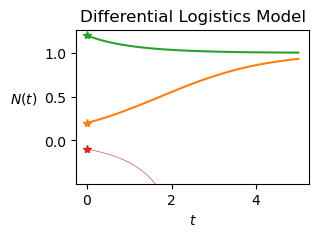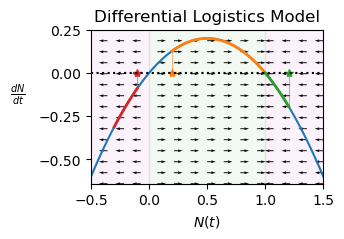!

<div style="direction: rtl">במרחב הפאזה אנחנו רואים איך המערכת נעה לעבר ערכים גדולים יותר (ימינה) כשהנגזרת חיובית וערכים קטנים יותר (שמאלה) כשהיא שלילית, ואת שתי נקודות השבת כשנגזרת היא 0. <br>הנקודה היא יציבה אם הנגזרת חיובית לפני הנקודה ושלילית אחרי, אז כל התחלה קרוב לנקודה תנוע אליה, ולא יציבה בכל מקרה אחר.</div>

---
<div style="direction: rtl">מצורפת טבלה על ההבדלים בין שני סוגי המודלים שראינו בחד מימד: משוואת רקורסיה בזמן בדיד ומשוואה דיפרנציאלית בזמן רציף.</div>

| | Discrete Model Fixed Points and Stability | Continuous Model Fixed Points and Stability |
|-| :------------: | :--------------: |
| Equation type | Recursion (or difference)| Differential|
| Form | $N\left(t+1\right)=F\left[t,N\left(t\right)\right]$ |$\frac{dN}{dt}=F\left[t,N\left(t\right)\right]$ |
| Fixed points | $N\left(t+1\right)=N\left(t\right)=N^*$ | $\left.\frac{dN}{dt}\right|_{N^*}=0$ |
| Stability | $\frac{dF}{dN\left(t\right)}=\frac{dN\left(t+1\right)}{dN\left(t\right)}=\lambda$ |$\frac{dF}{dN\left(t\right)}=\frac{d}{dN\left(t\right)}\frac{dN}{dt}=\alpha$ |
| unstable| $1<\lambda$| $0<\alpha$ |
| stable | $0<\lambda<1$ | $\alpha<0$|
|osc. stable|$-1<\lambda<0$ | $-$|
|osc. unstable|$\lambda<-1$|$-$|

---

<h2 style="direction: rtl"> <b> יציבות בדו מימד (לוטקה וולטרה)</b> </h2>

<div style="direction: rtl">עכשיו יש לנו שני משתנים, ולא רק אחד. במודל לוטקה-וולטרה: </div>

$$ \frac{dn_1}{dt}=r_1 n_1 \left(1-\frac{n_1+\alpha_{12}n_2}{K_1}\right)$$

$$ \frac{dn_2}{dt}=r_2 n_2 \left(1-\frac{n_2 + \alpha_{21}n_1}{K_2}\right)$$

<div style="direction: rtl">לכל אוכלוסייה יש משוואה לוגיסטית כמו במשתנה אחד, ותוספת של האוכלוסייה האחרת לחישוב עומס על כושר הנשיאה שנקבע לפי $\alpha$: <br> <ul> <li> $\alpha=0$ אין תוספת (מצב רגיל) </li> <li> $\alpha<0$ יש תוספת שלילית: נוכחות של האוכלוסייה האחרת מקטינה את העומס על כושר הנשיאה </li> <li> $\alpha>0$ יש תוספת חיובית: נוכחות של האוכלוסייה האחרת מגדילה את העומס על כושר הנשיאה </li> </ul> </div>

<div style="direction: rtl">במצגת יש טבלה של היחסים:</div>

|$\alpha_{12}$|$\alpha_{21}$|Relationship|
| :-: | :-: | :-: |
| $0$ | $0$ | Independant |
| $-$ | $0$ | Commensal |
| $0$ | $-$ | Commensal |
| $+$ | $0$ | Amensal |
| $0$ | $+$ | Amensal |
| $+$ | $-$ | Parasitic |
| $-$ | $+$ | Parasitic |
| $+$ | $+$ | Competitive |
| $-$ | $-$ | Co-operative |

<h4 style="direction: rtl"> <b> נקודות שבת ויציבות</b> </h4>

<div style="direction: rtl">בדומה לבמשתנה אחד רציף, גם פה נקודות השבת נמצאות כאשר אין שינוי, משמע הנגזרות שוות לאפס:</div>


$$ \frac{dn_1}{dt}=0=r_1 n_1^* \left(1-\frac{n^*_1+\alpha_{12}n^*_2}{K_1}\right)$$

$$ \frac{dn_2}{dt}=0=r_2 n_2^* \left(1-\frac{n_2^* + \alpha_{21}n_1^*}{K_2}\right)$$

<div style="direction: rtl">בניגוד למקרה החד מימדי, יש כאן שתי משוואות שצריך לאפס: הפתרונות לכל אחת מהן נקרא nullcline של המשתנה, והוא קו $G\left(n_1^*,n_2^*\right)=0$</div>

$$ \begin{matrix} \text{nullclines of }n_1: & n_1^*=0 & \text{or} & n_1^*+\alpha_{12}n_2^*=K_1 \end{matrix}$$

$$ \begin{matrix} \text{nullclines of }n_2: & n_2^*=0 & \text{or} & n_2^*+\alpha_{21}n_1^*=K_2 \end{matrix}$$

<div style="direction: rtl">נוכל לצייר את הקווים אלה על מרחב הפאזה: המרחב של שני המשתנים מייצג את כל המצבים האפשריים של המערכת (כל האפשרויות לגודל שתי האוכלוסיות).</div>

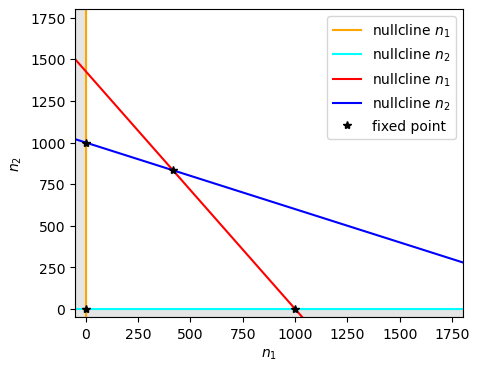

In [4]:
plt.figure(figsize=(5,4))

# parameters
r1,K1,r2,K2=0.5,1000,0.5,1000
alpha_12 = 0.7
alpha_21 = 0.4

# nullclines
plt.axvline(0,color='orange',label='nullcline $n_1$')
plt.axhline(0,color='cyan',label='nullcline $n_2$')
plt.axline((K1,0),slope=np.divide(1,-alpha_12),color='red',label='nullcline $n_1$')
plt.axline((0,K2),slope=-alpha_21,color='blue',label='nullcline $n_2$')

# fixed points
plt.plot(0,0,'*k',label='fixed point')
plt.plot(K1,0,'*k')
plt.plot(0,K2,'*k')
if alpha_12*alpha_21!=1:
    # lines have an intersection
    denom = 1-alpha_12*alpha_21
    plt.plot((K1-alpha_12*K2)/denom,(K2-alpha_21*K1)/denom,'*k')


plt.xlim(-50,1800)
plt.ylim(-50,1800)
plt.xlabel('$n_1$')
plt.ylabel('$n_2$')
plt.legend()

grey_out_negative()

plt.show()

<div style="direction: rtl">נקודות השבת יהיו בכל מקום בו nullcline <b> מסוגים שונים</b> נפגשים: שם שתי הנגזרות מתאפסות </div>

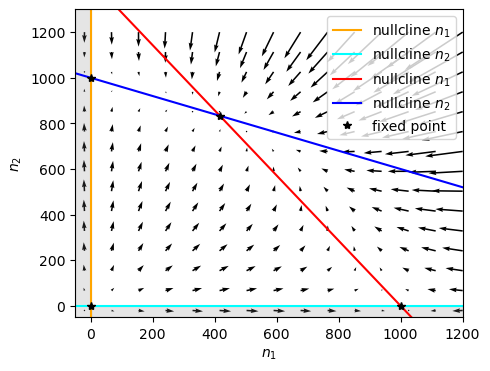

In [5]:
plt.figure(figsize=(5,4))
r1,K1,r2,K2=0.5,1000,0.5,1000
alpha_12 = 0.7
alpha_21 = 0.4

plot_nullcline_and_intersections(alpha_12,alpha_21,K1,K2)

N1,N2 = np.meshgrid(*np.linspace([-20,-20],[1200,1200],15).T)

def lotka_volterra(t,n):
    n1,n2 = n
    dn1dt=r1*n1*(1-(n1+alpha_12*n2)/K1)
    dn2dt=r2*n2*(1-(n2+alpha_21*n1)/K2)
    return (dn1dt, dn2dt)
    
dn1dt, dn2dt = lotka_volterra(0,(N1,N2))
plt.quiver(N1,N2,dn1dt,dn2dt)

# direction only:
# norm = dn1dt**2 + dn2dt**2
# norm = (norm + (norm==0))**0.5
# plt.quiver(N1,N2,dn1dt/norm,dn2dt/norm)

plt.xlim(-50,1200)
plt.ylim(-50,1300)
plt.xlabel('$n_1$')
plt.ylabel('$n_2$')
plt.legend()
grey_out_negative()

plt.show()

<div style="direction: rtl"> במקרה הזה, נקודת החיתוך של ה-nullcline הכחול והאדום היא הנקודה היציב. הנקודה בראשית הצירים היא נקודת אי יציבות, ושתי הנקודות האחרות הן "נקודות אוכף": הן יציבות בכיוון אחד ולא יציבות בכיוון אחר, כך שהמערכת נוטה "לחלוף" על פניה אם היא מגיעה מהכיוון היציב. אפשר לראות את זה באמצעות streamplot.</div>

In [6]:
time_trace=0;

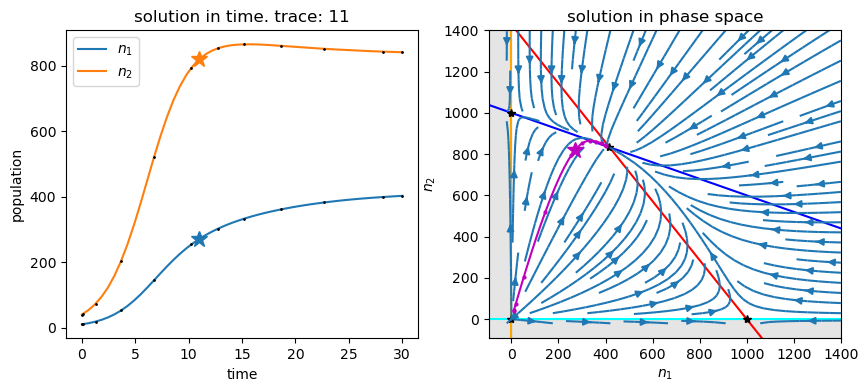

In [20]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

# time solution
plt.sca(axes[0])
time=np.linspace(0,30)
sol = solve_ivp(lotka_volterra,time[[0,-1]],[10,40],dense_output=True)
plt.plot(time,sol.sol(time).T,label=['$n_1$','$n_2$'])
plt.plot(sol.t,sol.y.T,'.k',markersize=2)
plt.xlabel('time')
plt.ylabel('population')
plt.title('solution in time')
plt.legend()

# phase space solution
plt.sca(axes[1])
plot_nullcline_and_intersections(alpha_12,alpha_21,K1,K2)
N1,N2 = np.meshgrid(*np.linspace([-20,-20],[1400,1400]).T)
dn1dt, dn2dt=lotka_volterra(0,(N1,N2))
plt.streamplot(N1,N2,dn1dt,dn2dt)
plt.plot(*sol.sol(time),'m')
plt.plot(*sol.y,'.m',markersize=4)
grey_out_negative()
plt.title('solution in phase space')

# trace the trajectory
axes[0].plot(time_trace,sol.sol(time_trace)[0],'*C0',markersize=12)
axes[0].plot(time_trace,sol.sol(time_trace)[1],'*C1',markersize=12)
axes[1].plot(*sol.sol(time_trace),'*m',markersize=12)
axes[0].set_title(f'solution in time. trace: {time_trace}')
time_trace+=1
plt.show()

<div style="direction: rtl">הדרך המתמטית למצוא את שיווי המשקל דורש עוד נגזרות וערכיים עצמיים של מטריצות, ולא נכנס לזה בקורס.<br> במקום זה, הסתכלנו על דברים ספציפית למקרה של לוטקה וולטרה:</div>

<div style="direction: rtl">הבנו שהנקודה האמצעית יציבה אם ההפרעה של כל אוכלוסייה על האחרת קטנה מההפרעה שלה על עצמה: בכל מקרה אחר אוכלוסייה אחת תמיד תגדל יותר ותפריע לאחרת כל כך שהיא תעלם. </div>

<div style="direction: rtl"> מה בדיוק קורה תלוי בפרמטרים של הבעייה: ערכים שונים של $\alpha$ משנים את סוגי הקווים והחיתוך שלהם</div>

<div style="direction: rtl">יש לנו שלושה קריטריונים חשובים: 
    <ol> 
        <li>הפרעה לא מנצחת בממוצע גיאומטרי</li>
        <li> ההפרעה של 1 על 2 לא דומיננטית </li>
        <li> ההפרעה של 2 על 1 לא דומיננטית </li>
    </ol>
</div>

$$ \begin{matrix} \left(1\right) \; \alpha_{12} \alpha_{21} < 1  & \left(2\right) \; K_1 < K_2 / \alpha_{21} & \left(3\right) \; K_2 < K_1/\alpha_{12} \end{matrix}$$


$$ \frac{dn_1}{dt}=0=r_1 n_1^* \left(1-\frac{n^*_1+\alpha_{12}n^*_2}{K_1}\right)$$

$$ \frac{dn_2}{dt}=0=r_2 n_2^* \left(1-\frac{n_2^* + \alpha_{21}n_1^*}{K_2}\right)$$

In [21]:
import ipywidgets as widgets
a12_widget = widgets.BoundedFloatText(value=0.5,
                                   min=-2, max=2, step=0.1,
                                   description='$\\alpha_{12}$',
                                  )

a21_widget = widgets.BoundedFloatText(value=0.5,
                                   min=-2, max=2, step=0.1,
                                   description='$\\alpha_{21}$',
                                  )

x_widget = widgets.BoundedFloatText(value=100,
                       min=0, max=1500, step=100,
                       description='$n_1\\left(0\\right)$',
                       )
y_widget = widgets.BoundedFloatText(value=110,
                       min=0, max=1500, step=100,
                       description='$n_2\\left(0\\right)$',
                       )


In [22]:
N1,N2 = np.meshgrid(*np.linspace([-20,-20],[1500,1500],30).T)
r1,K1,r2,K2=0.5,1000,0.5,1000
time=np.linspace(0,30)
a,b=(r1*N1-r1*N1*N1/K1, r1*N1*N2/K1)
c,d=(r2*N2-r2*N2*N2/K2, r2*N2*N1/K2)
def update(alpha_12,alpha_21,x,y):
    fig, axes = plt.subplots(1,2,figsize=(8,3))
    plt.sca(axes[0])
    def lotka_volterra(t,n):
        n1,n2 = n
        dn1dt=r1*n1*(1-(n1+alpha_12*n2)/K1)
        dn2dt=r2*n2*(1-(n2+alpha_21*n1)/K2)
        return (dn1dt, dn2dt)
    sol = solve_ivp(lotka_volterra,time[[0,-1]],[x,y],dense_output=True)
    plt.plot(time,sol.sol(time).T,label=['$n_1$','$n_2$'])
    plt.plot(sol.t,sol.y.T,'.k',markersize=2)
    plt.ylim(0)
    plt.xlabel('time')
    plt.ylabel('population')
    plt.title('solution in time')
    plt.legend()

    plt.sca(axes[1])
    plt.xlim(-20,1500)
    plt.ylim(-20,1500)

    plt.axvline(0,color='orange')
    plt.axhline(0,color='cyan')
    plt.axline((K1,0),slope=np.divide(1,-alpha_12),color='red')
    plt.axline((0,K2),slope=-alpha_21,color='blue')

    denom = 1-alpha_12*alpha_21
    plt.plot([0, K1, 0, np.divide(K1-alpha_12*K2,denom)],
             [0, 0, K2, np.divide(K2-alpha_21*K1,denom)],'*k',label='fixed point')

    plt.xlabel('$n_1$')
    plt.ylabel('$n_2$')
    data = plt.streamplot(N1,N2,a-alpha_12*b,c-alpha_21*d)
    plt.plot(*sol.sol(time),'m')
    plt.plot(*sol.y,'.m',markersize=4)
    plt.plot(x,y,'mx',markersize=8)
    plt.title(f'{alpha_12=:.4},{alpha_21=:.4}')

    plt.show()

# widgets.interact(update, alpha_12 = a12_widget, alpha_21 = a21_widget, x=x_widget, y=y_widget);
out = widgets.interactive_output(update, dict(alpha_12 = a12_widget, alpha_21 = a21_widget, x=x_widget, y=y_widget))

widgets.VBox([widgets.HBox([a12_widget, a21_widget]),widgets.HBox([x_widget, y_widget]), out])

<div style="direction: rtl"> אפשר לראות פה כמה נקודות מעניינות:<ul> 
        <li> כשהאלפאות קטנות, כל הקריטריונים נענים: מכל נקודה שנבחר, המערכת תנוע לדו-קיום</li>
        <li> כשאלפא אחת גדולה מאחד, קריטריון 2 או 3 נשברים: מכל נקודה שנבחר, המערכת תנוע לעבר השתלטות של האוכלוסייה המפריעה. נראה שאם מתחילים קרוב לנקודה של רק האוכלוסייה המופרעת המערכת תחלוף קרוב ליד ואז תנוע להשתלטות המפריע.</li>
    <li> כששני האלפאות גדולות מאחד, כל הקריטריונים נשברים: דו קיום הוא מצב לא יציב, שהמערכת עשויה לחלוף לידו אבל בהתאם לאוכלוסייה המקורית אחד מהמינים בסוף ישתלט.</li>
    </ul>
</div>

Example points:
* $\alpha_{12}=\alpha_{21}=0.5$ stable co-existance  
    * $n_1\left(0\right)=100,n_2\left(0\right)=100$ direct to co-ex.  
    * $n_1\left(0\right)=1200,n_2\left(0\right)=200$ passes near $n_1$ outcompete saddle  
    * $n_1\left(0\right)=1300,n_2\left(0\right)=1400$ collapse to co-ex.  
    * $n_1\left(0\right)=1400,n_2\left(0\right)=500$ example of trajectory pass through a nullcline  
* $\alpha_{12}=1.5,\alpha_{21}=0.5$ $n_2$ outcompete $n_1$  
    * $n_1\left(0\right)=100,n_2\left(0\right)=100$  
    * $n_1\left(0\right)=1400,n_2\left(0\right)=100$ passes near $n_1$ outcompete saddle  
    * $n_1\left(0\right)=600,n_2\left(0\right)=1200$  
* $\alpha_{12}=\alpha_{21}=1.5$ co-existance is a saddle point,  
    * $n_1\left(0\right)=100,n_2\left(0\right)=150$  choose $n_2$, passes near co-ex. saddle  
        * special case: fine balance $n_1\left(0\right)=n_2\left(0\right)=100$  
    * $n_1\left(0\right)=700,n_2\left(0\right)=100$  choose $n_1$  
    * $n_1\left(0\right)=100,n_2\left(0\right)=700$  choose $n_2$  
    * $n_1\left(0\right)=1400,n_2\left(0\right)=1300$  choose $n_1$, passes near co-ex. saddle
        * special case: fine balance $n_1\left(0\right)=n_2\left(0\right)=1400$  